In [3]:
# import the deliverables
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
# creating funcation to read data 
import cv2

labels = ['angry','disgust','fear','happy','neutral','sad','surprise']
img_size = 48
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [22]:
# fetching data 
train = get_data('data/all_expressions/train')
val = get_data('data/all_expressions/test')

C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Text(0.5, 1.0, 'angry')

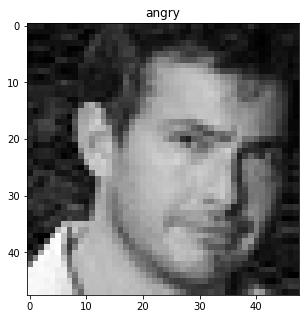

In [23]:
# visualize a random image from angry class
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'surprise')

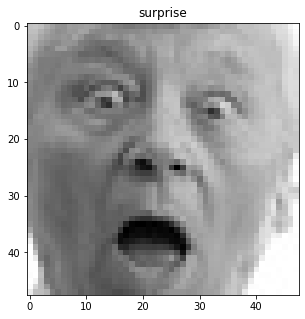

In [24]:
# visualize a random image from surprise class
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [25]:
#creating the training and testing variables

x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train)/255
x_val = np.array(x_val)/255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [30]:
model = tf.keras.Sequential([

        # input layer
        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(48,48,3)),
        tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu' ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        # 1st hidden dense layer
        tf.keras.layers.Conv2D(128,(5,5), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
    
        # 2nd hidden dense layer
        tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
    
        # 3rd hidden dense layer
        tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
    
        # Flatten layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    
        # output layer
        tf.keras.layers.Dense(7, activation='softmax')
    ])

In [31]:
#summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 23, 23, 128)       204928    
_________________________________________________________________
batch_normalization_7 (Batch (None, 23, 23, 128)      

In [32]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
# train the model
history = model.fit(x_train,y_train,epochs = 50 , validation_data = (x_val, y_val))

Epoch 1/50


C:\Users\hp\anaconda3\envs\mlenv\lib\site-packages\keras\backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


898/898 [==============================] - 648s 718ms/step - loss: 4.1206 - accuracy: 0.2635 - val_loss: 2.6838 - val_accuracy: 0.2825
Epoch 2/50
898/898 [==============================] - 694s 772ms/step - loss: 2.6312 - accuracy: 0.3863 - val_loss: 2.6419 - val_accuracy: 0.4163
Epoch 3/50
898/898 [==============================] - 714s 795ms/step - loss: 2.5416 - accuracy: 0.4519 - val_loss: 2.4468 - val_accuracy: 0.4565
Epoch 4/50
898/898 [==============================] - 746s 831ms/step - loss: 2.4249 - accuracy: 0.4800 - val_loss: 2.8219 - val_accuracy: 0.4175
Epoch 5/50
898/898 [==============================] - 725s 808ms/step - loss: 2.3456 - accuracy: 0.4939 - val_loss: 2.6778 - val_accuracy: 0.4152
Epoch 6/50
898/898 [==============================] - 732s 815ms/step - loss: 2.3241 - accuracy: 0.5057 - val_loss: 2.3659 - val_accuracy: 0.4879
Epoch 7/50
898/898 [==============================] - 735s 818ms/step - loss: 2.2604 - accuracy: 0.5150 - val_loss: 2.2066 - val_accura

In [34]:
model.save("FE_model.h5")

In [36]:
#running model again
model2 = keras.models.load_model("FE_model.h5")

In [37]:
model2.fit(x_train,y_train,epochs = 15 , validation_data = (x_val, y_val))

Epoch 1/15
898/898 [==============================] - 771s 855ms/step - loss: 1.2989 - accuracy: 0.6697 - val_loss: 1.4713 - val_accuracy: 0.6010
Epoch 2/15
898/898 [==============================] - 744s 828ms/step - loss: 1.2979 - accuracy: 0.6708 - val_loss: 1.5833 - val_accuracy: 0.5847
Epoch 3/15
898/898 [==============================] - 744s 829ms/step - loss: 1.4339 - accuracy: 0.6653 - val_loss: 2.6040 - val_accuracy: 0.5634
Epoch 4/15
898/898 [==============================] - 730s 812ms/step - loss: 1.6273 - accuracy: 0.6597 - val_loss: 1.6269 - val_accuracy: 0.6020
Epoch 5/15
898/898 [==============================] - 747s 831ms/step - loss: 1.3902 - accuracy: 0.6728 - val_loss: 2.0239 - val_accuracy: 0.5741
Epoch 6/15
898/898 [==============================] - 653s 727ms/step - loss: 1.3791 - accuracy: 0.6777 - val_loss: 1.8381 - val_accuracy: 0.5985
Epoch 7/15
898/898 [==============================] - 648s 722ms/step - loss: 1.2516 - accuracy: 0.6826 - val_loss: 1.5325 -

In [38]:
model2.save("FE_model2.h5")

In [43]:
#running model again
final_model = keras.models.load_model("FE_model2.h5")

In [44]:
final_model.fit(x_train,y_train,epochs = 35 , validation_data = (x_val, y_val))

Epoch 1/35
898/898 [==============================] - 808s 898ms/step - loss: 1.2849 - accuracy: 0.6926 - val_loss: 1.5377 - val_accuracy: 0.5892
Epoch 2/35
898/898 [==============================] - 560s 623ms/step - loss: 1.2183 - accuracy: 0.6971 - val_loss: 1.4878 - val_accuracy: 0.6151
Epoch 3/35
898/898 [==============================] - 563s 627ms/step - loss: 1.2956 - accuracy: 0.6896 - val_loss: 1.5739 - val_accuracy: 0.6088
Epoch 4/35
898/898 [==============================] - 587s 654ms/step - loss: 1.2503 - accuracy: 0.6993 - val_loss: 1.7566 - val_accuracy: 0.6071
Epoch 5/35
898/898 [==============================] - 604s 672ms/step - loss: 1.1984 - accuracy: 0.7000 - val_loss: 1.6804 - val_accuracy: 0.6085
Epoch 6/35
898/898 [==============================] - 594s 662ms/step - loss: 1.2043 - accuracy: 0.7040 - val_loss: 1.5896 - val_accuracy: 0.6023
Epoch 7/35
898/898 [==============================] - 564s 628ms/step - loss: 1.3273 - accuracy: 0.6949 - val_loss: 1.6609 -

In [45]:
final_model.save("final_model.h5")